In [2]:
!pip install brian2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.5 MB/s eta 0:00:00


Membrane potential at t = 40 ms using Euler method

Membrane potential at t = 40 ms: -0.1539


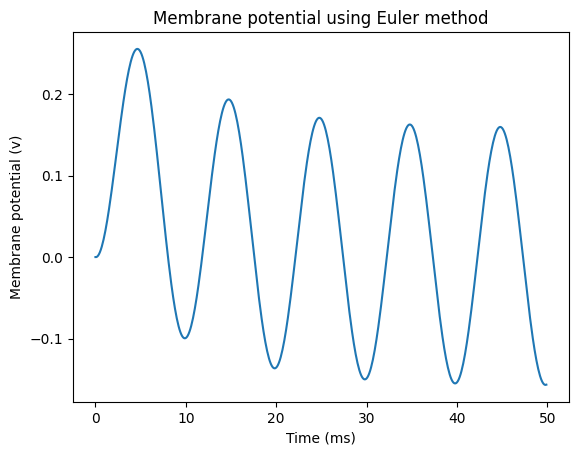

In [4]:
from brian2 import *

tau = 10*ms
duration = 50*ms

eqs = '''
dv/dt = (sin(2*pi*100*Hz*t) - v)/tau : 1
'''

G = NeuronGroup(1, eqs, method='euler')
G.v = 0  # initial membrane potential

M = StateMonitor(G, 'v', record=True)

run(duration)

print(f"Membrane potential at t = 40 ms: {M.v[0][int(40*ms/defaultclock.dt)]:.4f}")
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('Membrane potential (v)')
title('Membrane potential using Euler method')
show()


Plot membrane potential against time

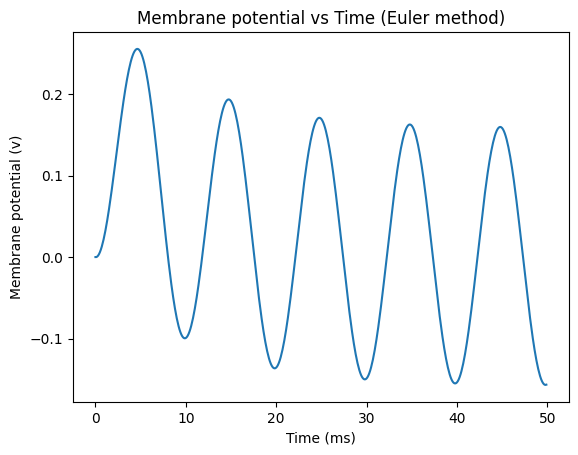

In [5]:
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('Membrane potential (v)')
title('Membrane potential vs Time (Euler method)')
show()

Membrane potential at t = 30 ms with threshold/reset and exact method

Membrane potential at t = 30 ms: 0.7509


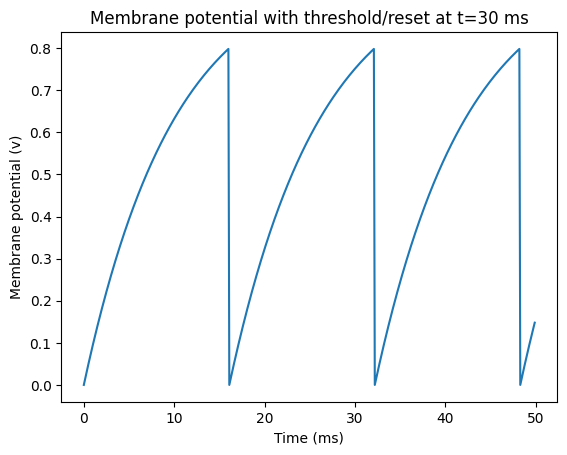

In [6]:
from brian2 import *

tau = 10*ms
duration = 50*ms

eqs = '''
dv/dt = (1 - v)/tau : 1
'''

G = NeuronGroup(1, eqs, threshold='v > 0.8', reset='v = 0', method='exact')
G.v = 0

M = StateMonitor(G, 'v', record=True)

run(duration)

print(f"Membrane potential at t = 30 ms: {M.v[0][int(30*ms/defaultclock.dt)]:.4f}")
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('Membrane potential (v)')
title('Membrane potential with threshold/reset at t=30 ms')
show()


Membrane potential at t = 10 ms with threshold/reset and exact method

Membrane potential at t = 10 ms: 0.6321


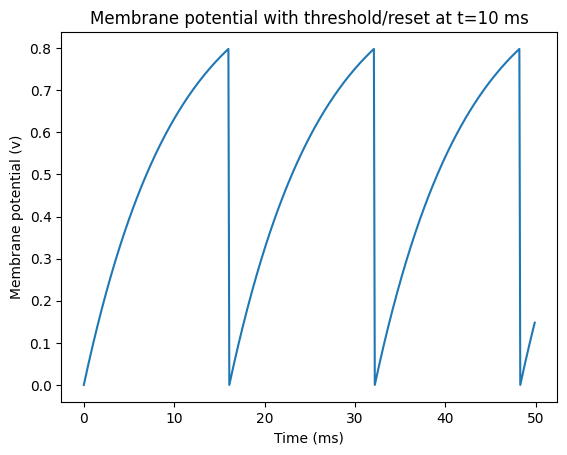

In [7]:
# Using the same parameters as block 3
G = NeuronGroup(1, eqs, threshold='v > 0.8', reset='v = 0', method='exact')
G.v = 0
M = StateMonitor(G, 'v', record=True)

run(duration)

print(f"Membrane potential at t = 10 ms: {M.v[0][int(10*ms/defaultclock.dt)]:.4f}")
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('Membrane potential (v)')
title('Membrane potential with threshold/reset at t=10 ms')
show()


Membrane potential at t = 50 ms with spike threshold = 0.6 and dashed lines for spikes

Membrane potential at t = 50 ms: 0.3229


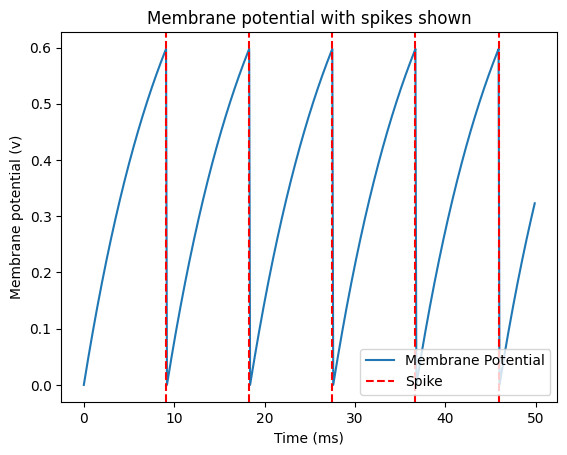

In [9]:
from brian2 import *

tau = 10*ms
duration = 50*ms

eqs = '''
dv/dt = (1 - v)/tau : 1
'''

G = NeuronGroup(1, eqs, threshold='v > 0.6', reset='v = 0', method='exact')
G.v = 0

M = StateMonitor(G, 'v', record=True)
spikemon = SpikeMonitor(G)

run(duration)

# Corrected line to prevent IndexError
print(f"Membrane potential at t = 50 ms: {M.v[0][int(50*ms/defaultclock.dt) - 1]:.4f}")

plot(M.t/ms, M.v[0], label='Membrane Potential')
for i, t in enumerate(spikemon.t/ms):
    label = 'Spike' if i == 0 else None
    axvline(t, color='r', linestyle='--', label=label)
xlabel('Time (ms)')
ylabel('Membrane potential (v)')
title('Membrane potential with spikes shown')
legend()
show()


#Conclusion

In this experiment, we explored the temporal evolution of a neuron's membrane potential under various dynamic conditions using the Brian2 simulator. The simulations demonstrated how different differential equations and integration methods influence neuronal behavior. Initially, the membrane potential governed by a sinusoidal input and integrated using the Euler method showed smooth oscillatory behavior, reaching a specific value at 40 ms. When using an exponential decay model with threshold and reset mechanisms, the exact method revealed periodic spiking behavior dependent on the threshold voltage. These spikes effectively reset the potential, emulating neuronal firing. By observing membrane potentials at specific time points (10 ms, 30 ms, and 50 ms), we analyzed how threshold settings (e.g., 0.6 and 0.8) control spike frequency and dynamics. The plots provided visual evidence of these behaviors, with spikes clearly marked and membrane potentials reflecting both gradual changes and instantaneous resets. Overall, the experiment provided valuable insights into the computational modeling of neurons and the role of simulation parameters in shaping neuronal responses.